In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.axes import Axes
import pandas as pd

from stoneforge.preprocessing import las_import

In [2]:
data,units = las_import("..//stoneforge//datasets/DP1.las")
data

,DEPT,SP,ILD,ILM,LL8,GR,CALI,DRHO,RHOB,NPHI,DT
0,100.0,-999.0,-999.0,-999.0,-999.0,25.1383,-999.0,-999.0,-999.0,-999.0,-999.0
1,100.5,-999.0,-999.0,-999.0,-999.0,24.7342,-999.0,-999.0,-999.0,-999.0,-999.0
2,101.0,-999.0,-999.0,-999.0,-999.0,24.9611,-999.0,-999.0,-999.0,-999.0,-999.0
3,101.5,-999.0,-999.0,-999.0,-999.0,25.1880,-999.0,-999.0,-999.0,-999.0,-999.0
4,102.0,-999.0,-999.0,-999.0,-999.0,25.4148,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...
15688,7944.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
15689,7944.5,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
15690,7945.0,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0
15691,7945.5,-999.0,-999.0,-999.0,-999.0,-999.0000,-999.0,-999.0,-999.0,-999.0,-999.0


In [3]:
print(units)

{'DEPT': 'F', 'SP': 'MV', 'ILD': 'OHMM', 'ILM': 'OHMM', 'LL8': 'OHMM', 'GR': 'GAPI', 'CALI': 'IN', 'DRHO': 'G/C3', 'RHOB': 'G/C3', 'NPHI': '%', 'DT': 'US/F'}


In [4]:
class Plot:
    def __init__(self, curve_name, track, color="black", xlim=None, xticks=None, label=None, linewidth=0.5):
        self.curve_name = curve_name
        self.track = track  # integer index of the track (1-based)
        self.color = color
        self.xlim = xlim
        self.xticks = xticks
        self.label = label if label else curve_name
        self.linewidth = linewidth

    def plot(self, ax, well_data, depth):
        curve = well_data[self.curve_name]
        ax.plot(curve, depth, color=self.color, linewidth=self.linewidth)
        ax.set_xlabel(self.label, fontsize=7)
        ax.xaxis.label.set_color(self.color)
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.tick_params(axis='x', colors='white', labelsize=0.1)

        if self.xlim:
            ax.set_xlim(*self.xlim)
        if self.xticks:
            ax.set_xticks(self.xticks)

        ax.grid(which='major', color='lightgrey', linestyle='-')


class WellLogPlot:
    def __init__(self, well_data, top_depth, bottom_depth):
        self.well = well_data
        self.top_depth = top_depth
        self.bottom_depth = bottom_depth
        self.depth = self.well['DEPT'] if 'DEPT' in self.well else self.well['DEPTH_MD']
        self.plots = []
        self.fig = None
        self.axes = {}

    def add_track(self, plot: Plot):
        self.plots.append(plot)

    def render(self):
        # Descobre número de tracks únicos
        track_ids = sorted(set(plot.track for plot in self.plots))
        n = len(track_ids)
        self.fig, axs = plt.subplots(ncols=n, figsize=(3 * n, 10), sharey=True)

        if n == 1:
            axs = [axs]

        # Map track number to axis
        self.axes = {track_id: ax for track_id, ax in zip(track_ids, axs)}

        for plot in self.plots:
            ax = self.axes[plot.track]
            plot.plot(ax, self.well, self.depth)
            ax.set_ylim(self.bottom_depth, self.top_depth)

        # Label de profundidade só no primeiro track
        axs[0].set_ylabel("Depth (m)")
        for ax in axs[1:]:
            plt.setp(ax.get_yticklabels(), visible=False)

        plt.tight_layout(rect=[0, 0, 1, 0.96])
        self.fig.subplots_adjust(wspace=0.0)

    def show(self):
        if self.fig:
            plt.show()

    def save(self, filepath):
        if self.fig:
            self.fig.savefig(filepath, dpi=300, bbox_inches='tight')

"0 ────────────────── GR ────────────────── 200"
"1.95 ─────────────── RHOB ─────────────── 2.95"
"45 ───────────────── NPHI ───────────────── -15"
"─────────────────────────────────────────────"

'─────────────────────────────────────────────'

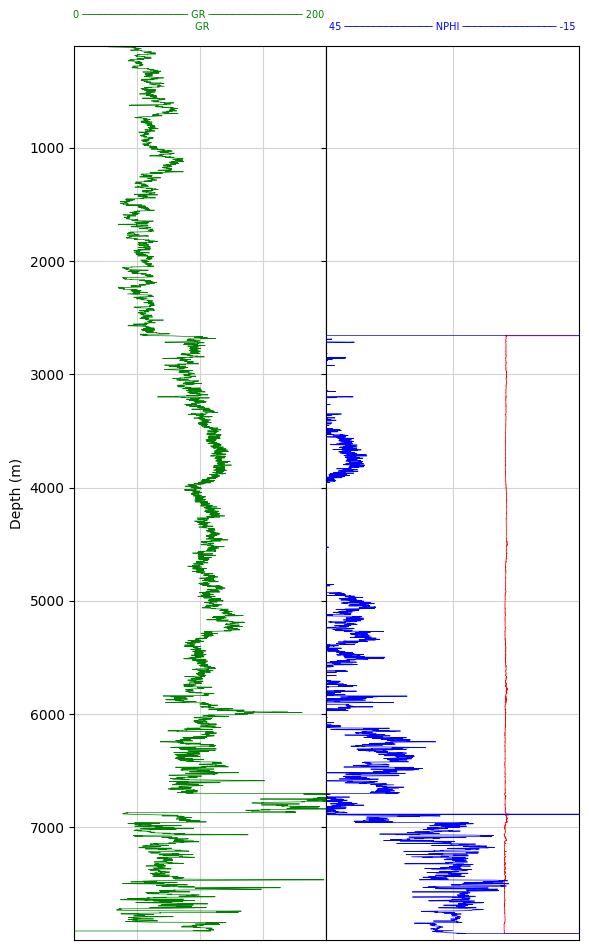

In [5]:
gr = Plot("GR", track=1, color="green", xlim=(0, 200), xticks=[0, 50, 100, 150, 200],
          label="0 ────────────────── GR ──────────────── 200 \n GR")
rhob = Plot("RHOB", track=2, color="red", xlim=(1.95, 2.95), xticks=[1.95, 2.45, 2.95],
            label="1.95 --------------- RHOB --------------- 2.95")
nphi = Plot("NPHI", track=2, color="blue", xlim=(45, -15), xticks=[45, 15, -15],
            label="45 ─────────────── NPHI ──────────────── -15")

plot = WellLogPlot(data, top_depth=100.5, bottom_depth=7994.5)
plot.add_track(gr)
plot.add_track(rhob)
plot.add_track(nphi)
plot.render()
plot.show()

In [27]:
def makeplot(well, top_depth, bottom_depth):
    fig, ax = plt.subplots(figsize=(15,10))

    #Set up the plot axes
    ax1 = plt.subplot2grid((1,3), (0,0), rowspan=1, colspan = 1)
    ax2 = plt.subplot2grid((1,3), (0,1), rowspan=1, colspan = 1, sharey = ax1)
    ax3 = ax2.twiny() #Twins the y-axis for the density track with the neutron track
    ax4 = plt.subplot2grid((1,3), (0,2), rowspan=1, colspan = 1, sharey = ax1)

    # As our curve scales will be detached from the top of the track,
    # this code adds the top border back in without dealing with splines
    #ax10 = ax1.twiny()
    #ax10.xaxis.set_visible(False)
    #ax11 = ax2.twiny()
    #ax11.xaxis.set_visible(False)
    #ax13 = ax4.twiny()
    #ax13.xaxis.set_visible(False)

    # Gamma Ray track
    ax1.plot(well["GR"], well['DEPT'], color = "green", linewidth = 0.5)
    ax1.set_xlabel("Gamma")
    ax1.xaxis.label.set_color("green")
    ax1.set_xlim(0, 200)
    ax1.set_ylabel("Depth (m)")
    #ax1.tick_params(axis='x', colors="green")
    #ax1.spines["top"].set_edgecolor("green")
    ax1.title.set_color('green')
    #ax1.set_xticks([0, 50, 100, 150, 200])

    # Density track
    ax2.plot(well["RHOB"], well['DEPT'], color = "red", linewidth = 0.5)
    ax2.plot(well["NPHI"], well['DEPT'], color = "blue", linewidth = 0.5)
    ax2.set_xlabel("Density")
    ax2.set_xlim(1.95, 2.95)
    #ax2.xaxis.label.set_color("red")
    #ax2.tick_params(axis='x', colors="red")
    #ax2.spines["top"].set_edgecolor("red")
    #ax2.set_xticks([1.95, 2.45, 2.95])

    # Neutron track placed ontop of density track
    ax3.plot(well["NPHI"], well['DEPT'], color = "blue", linewidth = 0.5)
    ax3.set_xlabel('Neutron \n')
    ax3.xaxis.label.set_color("blue")
    ax3.set_xlim(0.45, -0.15)
    ax3.tick_params(axis='x', colors="blue")
    #ax3.spines["top"].set_position(("axes", 1.08))
    #ax3.spines["top"].set_visible(True)
    #ax3.spines["top"].set_edgecolor("blue")
    #ax3.set_xticks([0.45,  0.15, -0.15])

    # Common functions for setting up the plot can be extracted into
    # a for loop. This saves repeating code.
    for ax in [ax1, ax2, ax4]:
        ax.set_ylim(bottom_depth, top_depth)
        ax.grid(which='major', color='lightgrey', linestyle='-')
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
    #    ax.spines["top"].set_position(("axes", 1.02))
        
    #for ax in [ax2, ax3, ax4]:
    #    plt.setp(ax.get_yticklabels(), visible = False)
        
    plt.tight_layout()
    fig.subplots_adjust(wspace = 0.15)

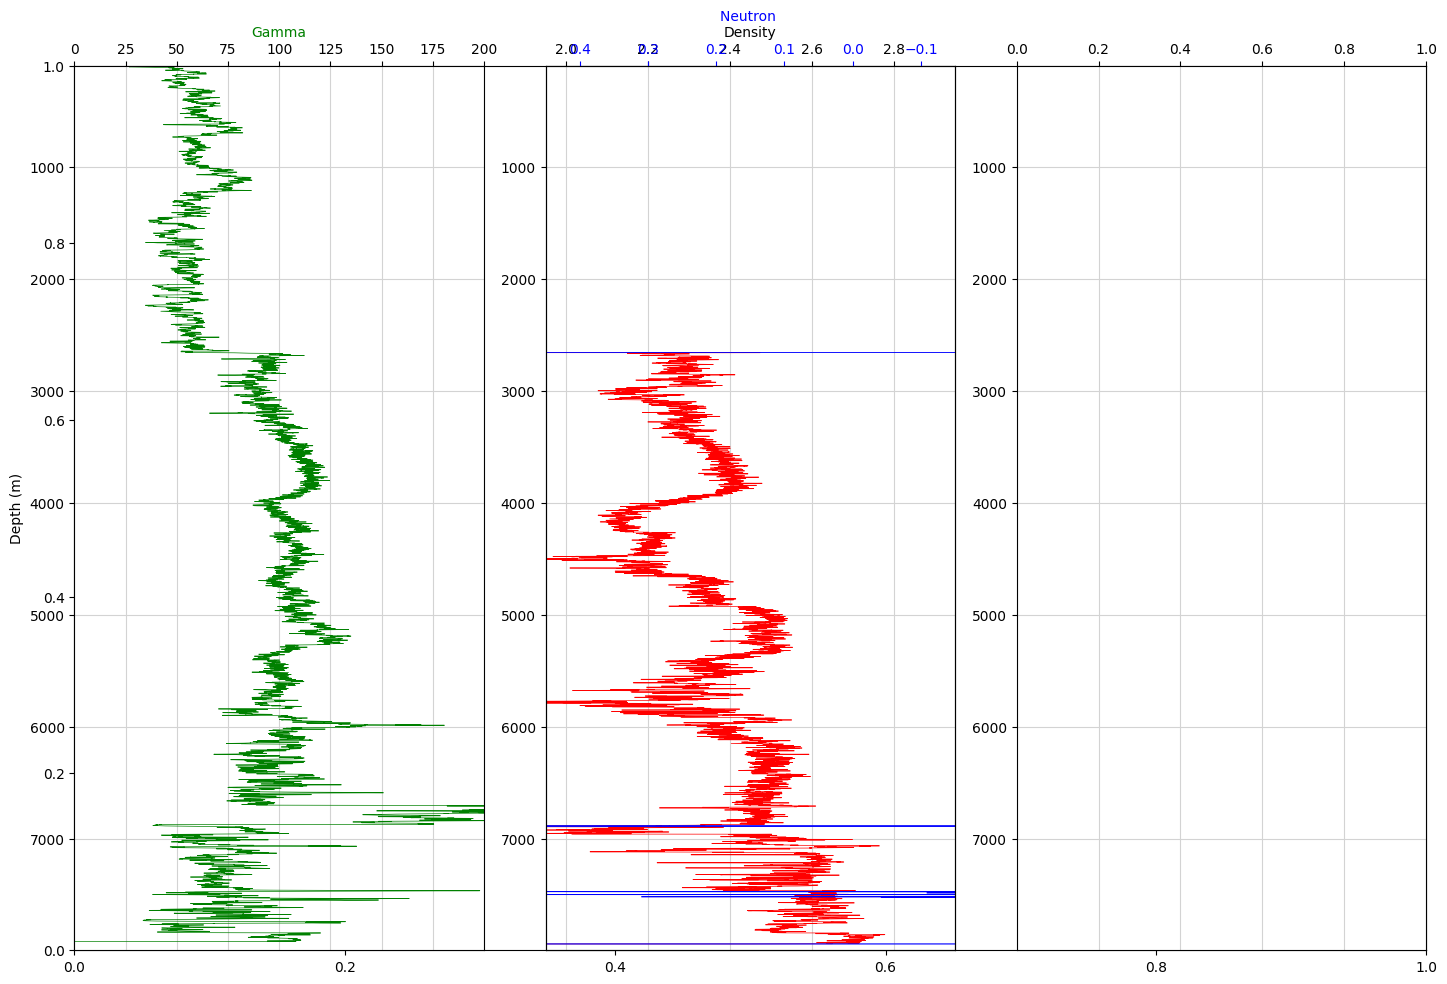

In [28]:
makeplot(data,top_depth=100.5, bottom_depth=7994.5)